# What are Stored Procedures?

Procedures are a simple way to save queries for later access. A stored procedure can be defined as a set of SQL statements stored in the MySQL server. 

For example, a `SELECT` statement that returns all the male actors can be turned into a stored procedure. A stored procedure can be invoked using the `CALL` statement, which executes the query and returns the result.

When the stored procedures are called, MySQL compiles the code of the procedure and stores it in the cache. Then the code is executed. Any subsequent calls to the same stored procedure result in execution of the previously compiled code.

Just like functions, we can pass parameters to stored procedures. Stored procedures have conditional statements and loops, and can call other stored procedures.

There are several advantages of using stored procedures. 
* They reduce the traffic between applications and the server because, instead of sending queries, only the name of the stored procedure is sent to the server.
* Since a stored procedure can be called by other procedures, it reduces the duplication of code.
* Performance gains are also achieved by using stored procedures because the code can be pre-compiled instead of parsing the query every time.
* Stored procedures can be used for security by giving users access to certain procedures without giving access to the tables.

Despite the above-mentioned advantages, stored procedures have certain limitations. 
* Stored procedures are difficult to debug as they get automatically executed, and it is not possible to apply checkpoints in the code.
* Stored procedures incur a resource overhead and may result in overuse of memory and CPU.
* There is no way to roll back a change to a stored procedure once it is made.

# Create, Alter, and Delete a Stored Procedure

**To create a stored procedure, we use the `CREATE PROCEDURE` statement**. 
* `CREATE PROCEDURE` keywords are followed by the procedure name.
* We can also specify parameters to our procedure as a comma-separated list within parentheses after the procedure name.
* The body of the stored procedure is enclosed within the `BEGIN` and `END` keywords.

In order to delete a stored procedure, the `ALTER ROUTINE` privilege is a must. 
* The `DROP PROCEDURE` statement deletes a stored procedure from the database.
* It can be used with the optional `IF EXISTS` clause.

---

We can create a stored procedure ShowActors that displays all the actors in our database as follows:

```mysql
DELIMITER **
CREATE PROCEDURE ShowActors()
BEGIN
 SELECT *  FROM Actors;
END **
DELIMITER ;
```

* We have used the `DELIMITER` command in line 1. 
* By default semicolon (;) is used to separate two statements. 
* Since a stored procedure can have multiple statements that end with a semicolon character, it will not be considered as a single statement. 
* The `DELIMITER` keyword is used to redefine the delimiter to **`**`** so that we can pass the whole stored procedure to the server as a single statement. 
* We use our redefined delimiter in line 5 to signal the end of the stored procedure. 
* Then the delimiter is set back to a semicolon in the last line.
* The body of our stored procedure consists of a simple `SELECT` statement.

---

The `CALL` statement is used to invoke a stored procedure as follows:

```mysql
CALL ShowActors();
```

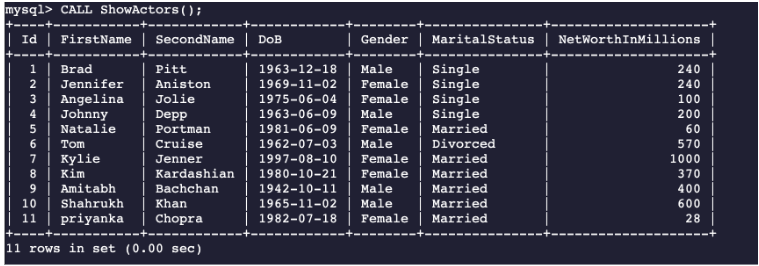

---

To view the stored procedures in a database, we will use the `SHOW PROCEDURE STATUS` statement as follows:

```mysql
SHOW PROCEDURE STATUS;
```

---

A `WHERE` clause can be used with the above statement to view the stored procedures of any database by specifying the name of the database.

```mysql
SHOW PROCEDURE STATUS 
WHERE db = 'MovieIndustry';
```

The `information_schema` database contains the data about all the stored procedures in all the databases. We can query the `routines` table in this database as follows:

```mysql
SELECT routine_name
FROM information_schema.routines
WHERE routine_type = 'PROCEDURE'
AND routine_schema = 'sys';
```

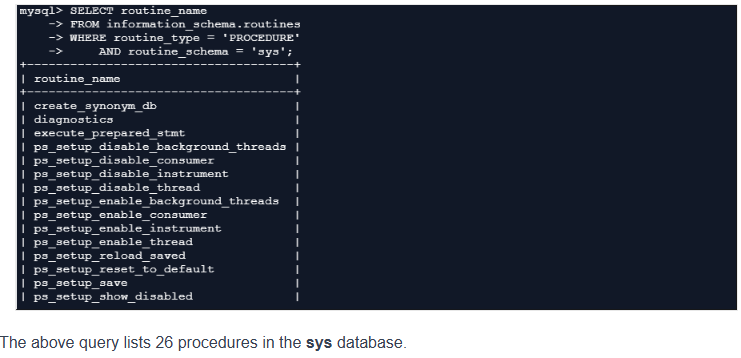

---

To delete the stored procedure we just created execute the following query:

```mysql
DROP PROCEDURE IF EXISTS ShowActors;
```

The `IF EXISTS` clause in this statement is optional. It is used to avoid an error message in case we attempt to delete a stored procedure that does not exist. A warning is issued instead.

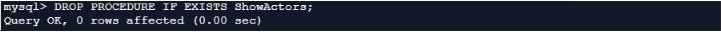

---

It is possible to make changes to a stored procedure. 
* However, there are no MySQL statements that can directly modify the parameter list or the body of the stored procedure.
* To make changes to a stored procedure, the only way is to delete the procedure and then re-create it.

# Variables

A variable is nothing but a data object with a name associated with it. Variables help store a user-defined, temporary value that can be referred to in subsequent statements.

A variable must be declared before it can be used in the code. 
* The `DECLARE` keyword is used to declare variables by providing the data type and an optional default value.
* If `DEFAULT` is not used at the time of declaration, then the variable will have a `NULL` value.

Assignment of a value to a variable is done using the `SET` keyword. 

Another way to assign values to a variable is to use it in a query with a `SELECT INTO` statement.

The scope of a variable defines its lifetime after which it becomes unavailable. 
* The scope of a variable created in a stored procedure is local, meaning that it will not be accessible after the `END` statement of the stored procedure.
* Inside the stored procedure, the scope of a variable depends on where it is declared.
* This means we can have multiple variables of the same name in a stored procedure as long as they have different scopes.

**SYNTAX**:

```mysql
DECLARE VarName DataType (VarLength) [DEFAULT DefaultValue];

SET VarName = value;

SELECT ColName
INTO VarName
FROM TableName;
```

**EXAMPLE**:

```mysql
-- Query 1
DELIMITER **
CREATE PROCEDURE Summary()
BEGIN
	DECLARE TotalM, TotalF INT DEFAULT 0;
    DECLARE AvgNetWorth DEC(6,2) DEFAULT 0.0;
    
    SELECT COUNT(*) INTO TotalM
    FROM Actors
    WHERE Gender = 'Male';
    
    SELECT COUNT(*) INTO TotalF
    FROM Actors
    WHERE Gender = 'Female';
    
    SELECT AVG(NetWorthInMillions) INTO AvgNetWorth
    FROM Actors;
    
    SELECT TotalM, TotalF, AvgNetWorth;
END**
DELIMITER ;

-- Query 2
CALL Summary();
```

# Parameters

A parameter is a placeholder for a variable that is used to pass data to and from a stored procedure. 
* An input parameter is used to pass a data value to a stored procedure, and an output parameter lets the stored procedure pass a data value back to the caller.
* A parameter can be defined by specifying the **mode** as well as the data type and **an optional maximum length**.

Parameters are used to make a stored procedure flexible. 
* Another reason for using parameters is avoiding direct user input in a query string.
* A user input can result in a runtime error, and in the worst case, a malicious input can potentially harm the system.

In MySQL, a parameter can have three modes: `IN`, `OUT`, and `INOUT`. 

If the mode of a parameter is defined as `IN`, it indicates that the application calling the stored procedure has to pass an argument. The stored procedure can not alter the value of the argument; rather, it only works on a copy of the IN parameter, and the original value of the parameter is retained after the stored procedure ends.

A parameter defined as having `OUT` mode indicates that the stored procedure will pass an argument back to the caller. The value of an OUT parameter can change in the stored procedure, and the new value is passed back in the end. The stored procedure, however, cannot access the initial value of the OUT parameter, and its value is NULL when the procedure begins execution. 

The third mode, `INOUT`, has properties of both the `IN` and `OUT` modes. The caller may pass an argument to the stored procedure, and the stored procedure can work on it and pass the altered value back to the caller.

**SYNTAX**

```mysql
[IN | OUT | INOUT] parameter_name datatype [(length)]
```

**EXAMPLE**:

```mysql
DELIMITER **

CREATE PROCEDURE GetActorCountByNetWorth (
 IN  NetWorth INT,
 OUT ActorCount INT
)
BEGIN
 SELECT COUNT(*)
 INTO ActorCount
 FROM Actors
 WHERE NetWorthInMillions >= NetWorth;
END**

DELIMITER ;
```

* We have specified two parameters for our stored procedure, one is input and the other is output. 
* To receive the return value, we will pass a session variable.
* A session variable is preceded by `@` sign.

The value returned by the stored procedure can then be displayed using a `SELECT` statement as follows:

```mysql
CALL GetActorCountByNetWorth(500, @ActorCount);
SELECT @ActorCount;
```

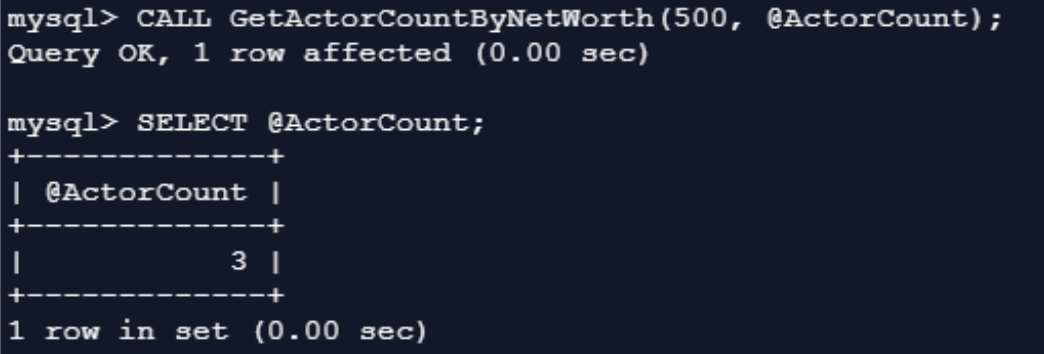

---

When the mode of a parameter is `INOUT`, the stored procedure can access the original value of the parameter when it is passed to it, and that becomes the parameter’s initial value within the procedure.

```mysql
DELIMITER **

CREATE PROCEDURE IncreaseInNetWorth(
INOUT IncreasedWorth INT,
IN ActorId INT,
)
BEGIN
DECLARE OriginalNetWorth INT;

SELECT NetWorthInMillions Into OriginalNetWorth
FROM Actors WHERE Id = ActorId;

SET IncreasedWorth = OriginalNetWorth + IncreasedWorth;

END**
```

To run the stored procedure execute the following:

```mysql
SET @IncreasedWorth = 50;

CALL IncreaseInNetWorth(@IncreasedWorth, 11);

SELECT @IncreasedWorth;
```

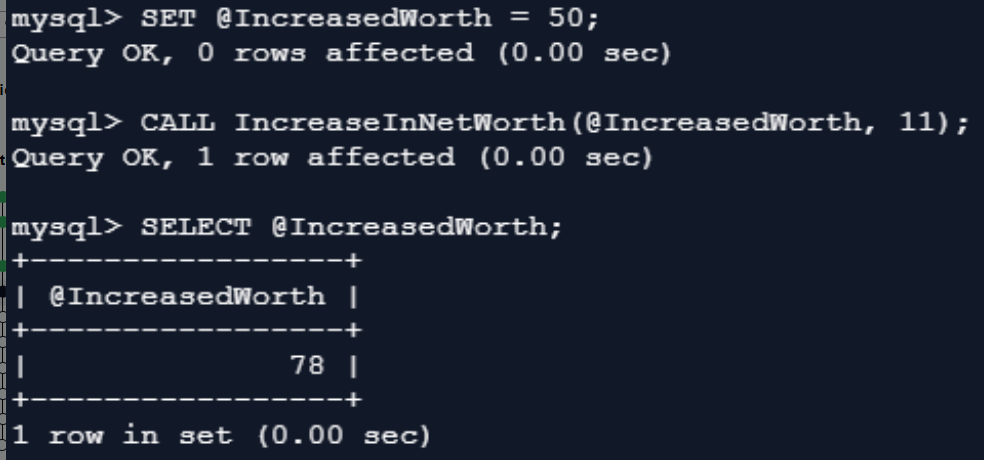

--- 

A stored procedure can return multiple values back to the caller.
* This is in contrast to a stored function, which can only return one value.
* We will discuss stored functions later.

```mysql
DELIMITER **

CREATE PROCEDURE GenderCountByNetWroth(
 IN NetWorth INT,
 OUT MaleCount INT,
 OUT FemaleCount INT)
BEGIN
     SELECT COUNT(*) INTO MaleCount
     FROM Actors
     WHERE NetWorthInMillions >= NetWorth
           AND Gender = 'Male';

 SELECT COUNT(*) INTO FemaleCount
     FROM Actors
     WHERE NetWorthInMillions >= NetWorth
           AND Gender = 'Female';

END**
DELIMITER ;
```

In this stored procedure, the two `OUT` parameters get their value based on the IN parameter NetWorth.

```mysql
CALL GenderCountByNetWroth(500, @Male, @Female);

SELECT @Male, @Female;
```

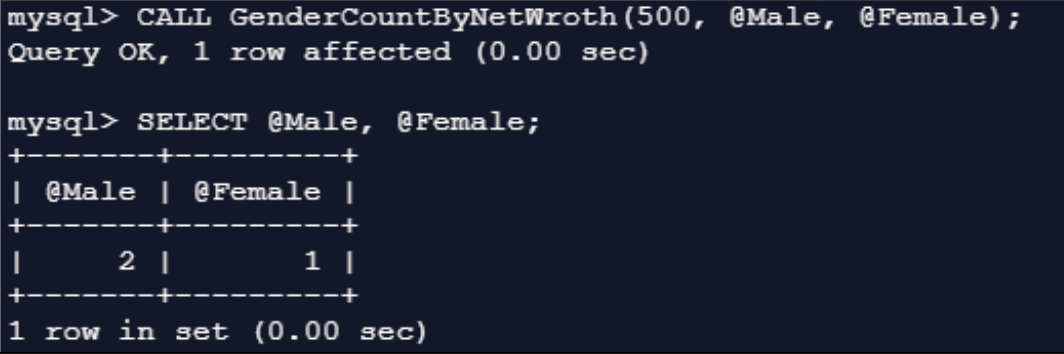

# Conditional Statements

* MySQL supports two conditional control statements, `IF` and `CASE`. 
* Both provide similar functionality, and the choice between the two is a matter of personal preference.
* However, we will discuss situations in which choosing one type of statement may be better than the other.

**Both `IF` and `CASE` can be used interchangeably**. 
* `CASE` statement is more readable while `IF` is familiar to programmers and hence more easily understood.
* When using `CASE`, **explicit error handling** is needed for `NULL` values because failure to match a condition will result in an error.

## IF Statement

The structure of MySQL IF statement is very similar to one used in other programming languages.

There are three different forms of the `IF` statement depending on how many conditions are being tested:
* IF-THEN
* IF-THEN-ELSE
* IF-THEN-ELSEIF-ELSE

**SYNTAX**: 

```mysql
IF condition THEN
If_statements;
ELSEIF else-if_condition THEN
else_if_statements;
…
ELSE
else_statements;
END IF;

```

* A condition can be evaluated as `TRUE`, `FALSE`, or `NULL` (neither `true` nor `false`). 
* So, unlike other programming languages, if a condition is not `TRUE`, it does not automatically mean that it is `FALSE`.
* Multiple statements can be written in a block, including calls to stored procedures, `SET` statements, loops, and nested `IF`s.


## CASE Statement

`CASE` statement is an alternate conditional control statement offered by MySQL. 

Any stored procedure that has `IF` statement can be replaced by `CASE` statement and vice versa. 

CASE statement: 
* **Simple `CASE`**: compare the output to multiple distinct values.
* **Searched `CASE`**: It can handle complex conditions with multiple expressions. It is used to test conditions involving ranges.

The condition after the `WHEN` keyword is evaluated, and if it evaluates to `TRUE`, then the statements in the corresponding `THEN` block are executed. If no condition evaluates to `TRUE`, then the **optional** `ELSE` block is executed and an error message is issued if the ELSE block does not exist. To ignore errors, an **empty** `BEGIN END` block can be written in the `ELSE` block.

**SYNTAX 1**: 

```mysql

CASE case_value

WHEN case_value1 THEN statements
WHEN case_value2 THEN statements
…

[ELSE else-statements]

END CASE;

```

**SYNTAX 2**: 

```mysql

CASE

WHEN case_1 condition THEN statements
WHEN case_2 condition THEN statements
…

[ELSE else-statements]

END CASE;

```

## Example: IF-THEN-ELSEIF-ELSE

```mysql
DELIMITER **

CREATE PROCEDURE GetMaritalStatus(
 IN  ActorId INT, 
 OUT ActorStatus  VARCHAR(30))
BEGIN
 DECLARE Status VARCHAR (15);

 SELECT MaritalStatus INTO Status
 FROM Actors
 WHERE Id = ActorId;

 IF Status LIKE 'Married' THEN
     SET ActorStatus = 'Actor is married';

 ELSEIF Status LIKE 'Single' THEN
     SET ActorStatus = 'Actor is single';

 ELSEIF Status LIKE 'Divorced' THEN
     SET ActorStatus = 'Actor is divorced';

 ELSE
     SET ActorStatus = 'Status not found';

 END IF;
END **

DELIMITER ;
```

* The `IF` and `ELSEIF` blocks test the different values of the **MaritalStatus** column. 
* The `ELSE` block is used to handle errors in case there is a `NULL` value in the **MaritalStatus** column, since this block is executed if no match is found.

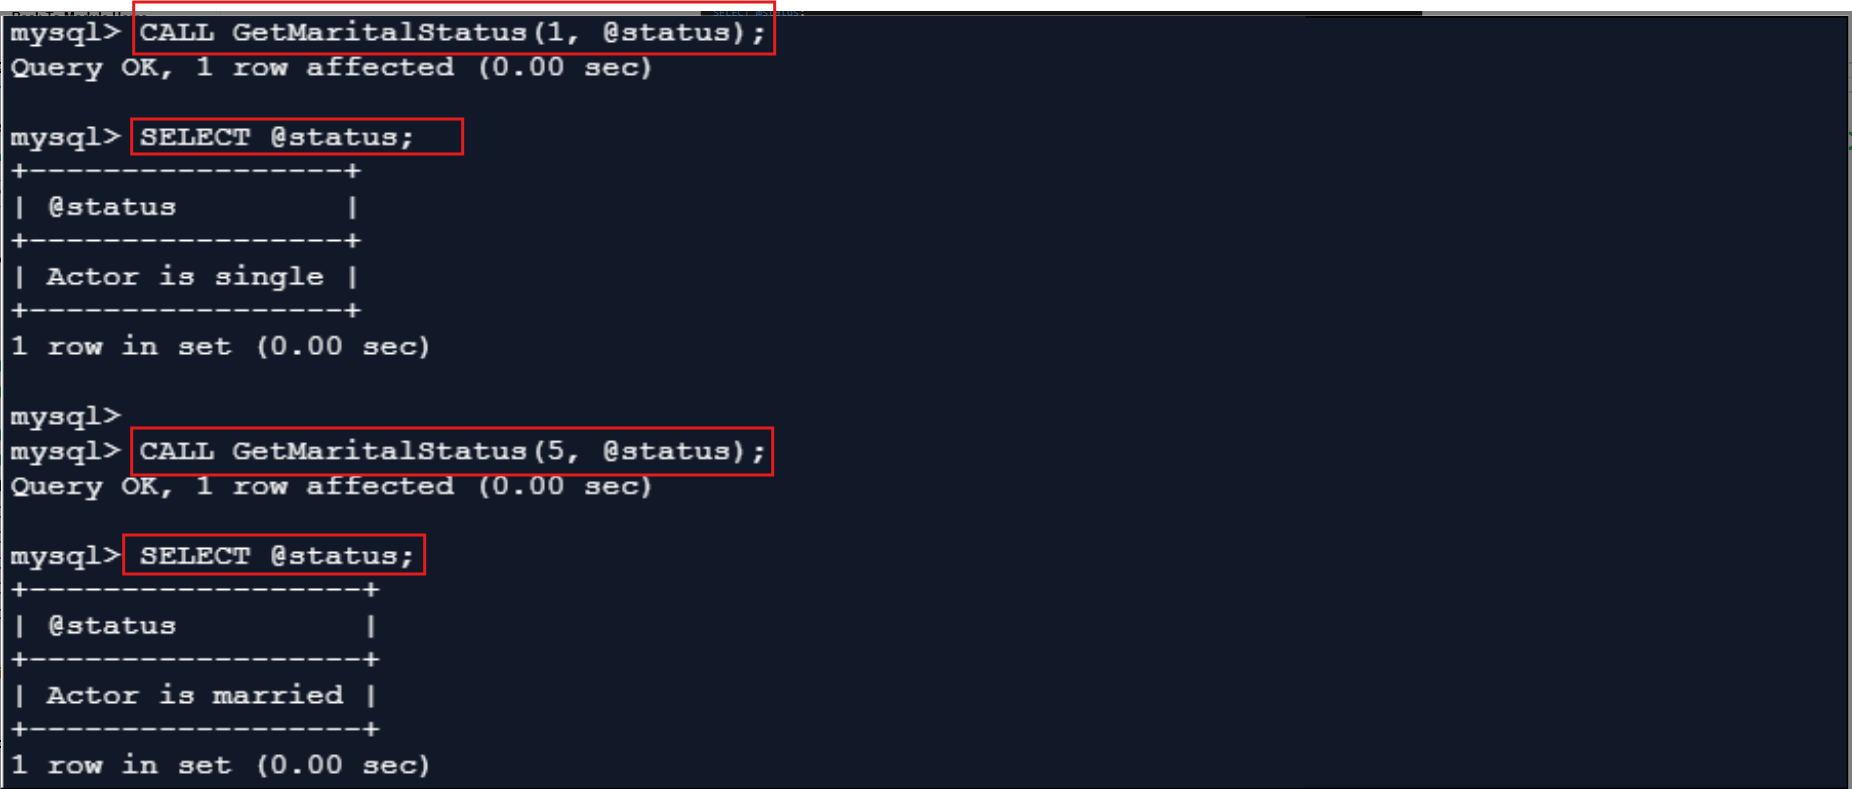

## Example: CASE

**Simple CASE**

```mysql
DELIMITER **
CREATE PROCEDURE GetMaritalStatus(
 IN  ActorId INT, 
 OUT ActorStatus VARCHAR(30))
BEGIN
 DECLARE Status VARCHAR (15);

 SELECT MaritalStatus INTO Status
 FROM Actors 
 WHERE Id = ActorId;

 CASE Status
     WHEN 'Married' THEN
         SET ActorStatus = 'Actor is married';
     WHEN 'Single' THEN
         SET ActorStatus = 'Actor is single';
     WHEN 'Divorced' THEN
         SET ActorStatus = 'Actor is divorced';
     ELSE
         SET ActorStatus = 'Status not found';
 END CASE;
END**

DELIMITER ;
```

**Searched CASE**

```mysql
CREATE PROCEDURE GetAgeBracket(
    IN ActorId INT,
    OUT AgeRange VARCHAR(30))
BEGIN
 DECLARE age INT DEFAULT 0;

 SELECT TIMESTAMPDIFF(YEAR, DoB, CURDATE())
 INTO age
 FROM Actors
 WHERE Id = ActorId;
 
 CASE
     WHEN age < 20 THEN 
         SET AgeRange = 'Less than 20 years';
     WHEN age >= 20 AND age < 30 THEN
         SET AgeRange = '20+';
     WHEN age >= 30 AND age < 40 THEN
         SET AgeRange = '30+';
     WHEN age >= 40 AND age < 50 THEN
         SET AgeRange = '40+';
     WHEN age >= 50 AND age < 60 THEN
         SET AgeRange = '50+';
     WHEN age >= 60 THEN
         SET AgeRange = '60+';
     ELSE
         SET AgeRange = 'Age not found';
 END CASE;  
END**
DELIMITER ;
```

**OUTPUT**

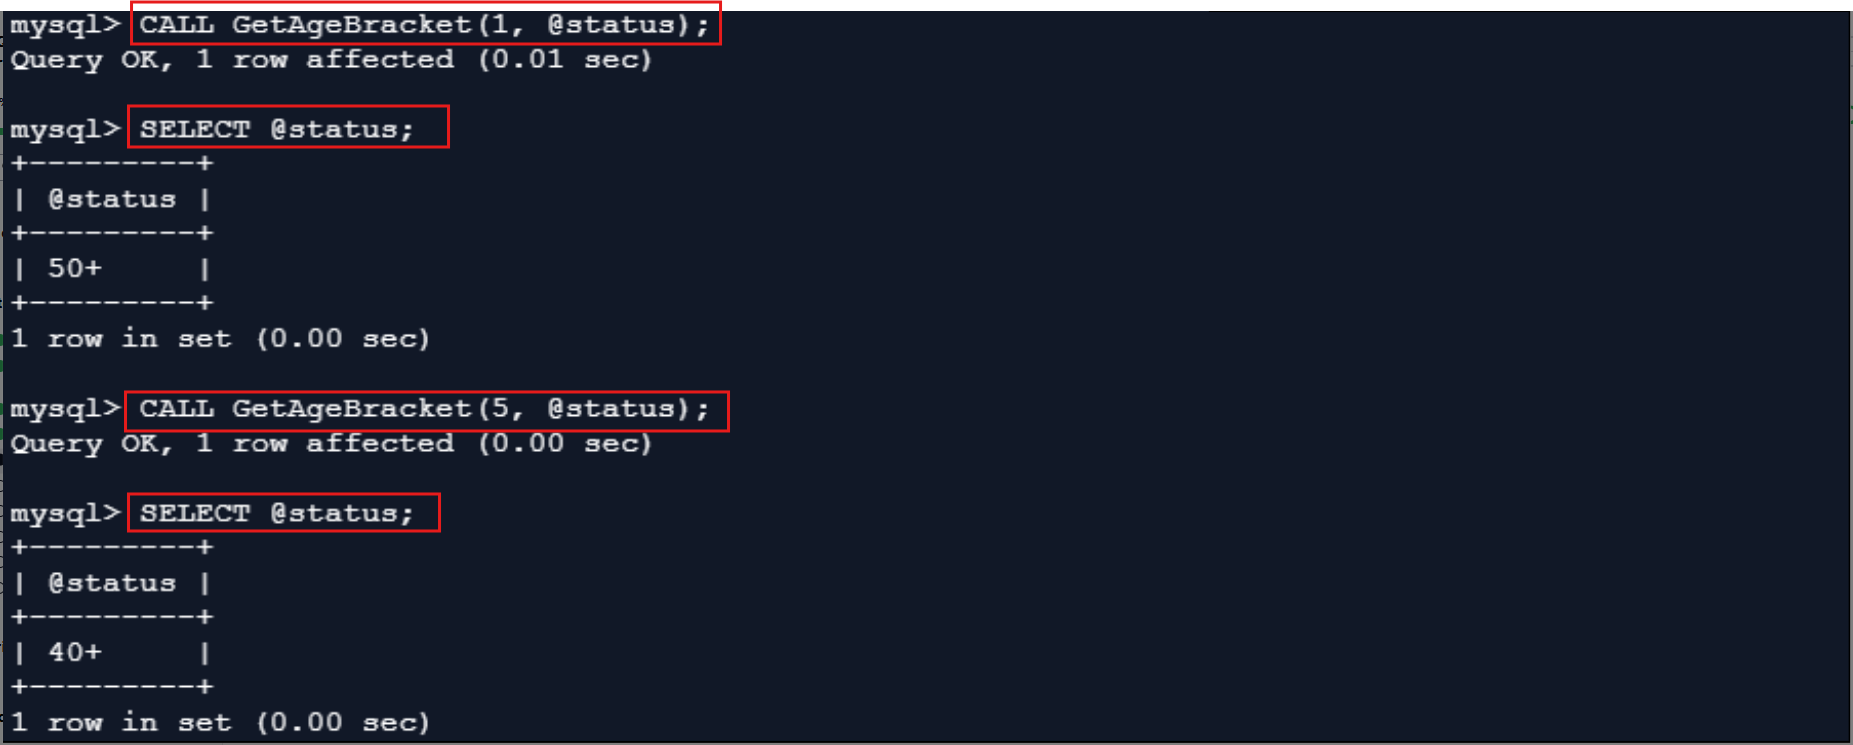

# Iterative Statements

## LOOP:

* Any statements between the `LOOP` and `END LOOP` keywords are repeated until a condition for termination is met. 
* The `LOOP` statement can start with an optional label, which is used to refer to the loop.
* The `LEAVE` statement is used to break the execution.
* The `ITERATE` statement is used to ignore processing and start a new iteration of the loop.

**SYNTAX**

```mysql
[label]: LOOP

statements;

IF condition THEN

LEAVE [label];

END IF;

…

END LOOP [label];
```

## WHILE:

* The `WHILE` statement checks the terminating condition at the beginning of each iteration, and if `TRUE`, then the statements are executed.
* The process continues as long as the condition is `TRUE`.
* If the terminating condition is not `TRUE` to begin with, then the `WHILE` loop will not execute.

**SYNTAX**

```mysql
[label] WHILE condition DO

statements;

END WHILE [label]
```

## REPEAT:

* The `REPEAT` statement checks the terminating condition at the end of each iteration after the `UNTIL` keyword, and if `TRUE`, then the statements are executed.
* The process continues as long as the condition is `TRUE`.
* Since the `REPEAT` statement checks the terminating condition at the end of each iteration, which means even if the terminating condition is not `TRUE` to begin with, the `REPEAT` statement will execute at least once always.
* `WHILE` loops are **pre-test** loops because they test the condition before the statements are executed, and the REPEAT loops are **post-test** loops as they test the condition after executing the loop statements. 

**SYNTAX**

```mysql
[label:] REPEAT

statements;

UNTIL condition

END REPEAT [label]
```

## LEAVE:

* The `LEAVE` statement is used within the **LOOP** construct to terminate the execution of the loop.
* It can also be used to exit from a stored procedure.
* Basically, the `LEAVE` statement that has a **label** associated with it, **exits the flow control of that label**.
* So, in case of nested loops, we can break out of both loops with a single statement.

The following syntax is used to exit a stored procedure:

```mysql
CREATE PROCEDURE Procedure1() label:

BEGIN

statements;

IF condition THEN

LEAVE label;

END IF;

statements

END
```

## Example: Loop

```mysql
DELIMITER **
CREATE PROCEDURE PrintMaleActors(
    OUT str  VARCHAR(255))
BEGIN

DECLARE TotalRows INT DEFAULT 0;
DECLARE CurrentRow INT;
DECLARE fname VARCHAR (25);
DECLARE lname VARCHAR (25);
DECLARE gen VARCHAR (10);

SET CurrentRow = 1;
SET str =  '';

SELECT COUNT(*) INTO TotalRows 
FROM Actors;

Print_loop: LOOP
 IF CurrentRow > TotalRows THEN
   LEAVE Print_loop;
 END IF;

SELECT Gender INTO gen 
FROM Actors 
WHERE Id = CurrentRow;

IF gen NOT LIKE 'Male' THEN
 SET CurrentRow = CurrentRow + 1;
 ITERATE Print_loop;
ELSE
 SELECT FirstName INTO fname 
 FROM Actors 
 WHERE Id = CurrentRow;

 SELECT SecondName INTO lname 
 FROM Actors 
 WHERE Id = CurrentRow;

 SET  str = CONCAT(str,fname,' ',lname,', ');
 SET CurrentRow = CurrentRow + 1;
END IF;
END LOOP Print_loop;

End **

DELIMITER ;
```

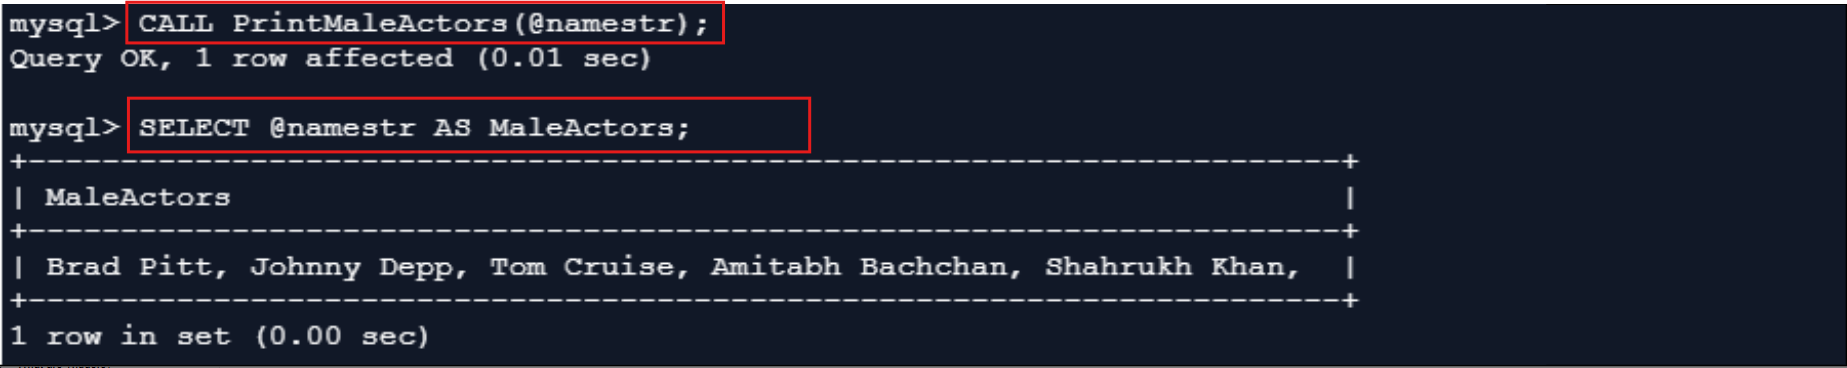

> **NOTE:** Same can be implemented using `WHILE` & `REPEAT` loop.

# Coursors

Cursors are a kind of loop that is used to traverse the rows returned by a query. Just as the cursor on the computer screen shows the current position, a database cursor also shows its current position in the result set. Cursors can only be used in stored procedures, functions, and triggers to loop through the results of a query one row at a time.

* Cursors are **read-only**, meaning they can only be used to view the result-set and not update it.
* They are **non-scrollable**, meaning they can only show rows in the result-set in a sequential manner. It is not possible to view rows in a different order than the one returned by the query or to skip some rows to reach a specific row.
* MySQL cursors are **asensitive**, meaning they point to the actual data in the table.
* There is another type of cursor that creates a temporary table for the result set. This type is called **insensitive cursors**, and these are not supported by MySQL.
* A potential drawback of working with the actual data in the table and not a temporary copy is that any changes made to the data from another connection can affect the results of the **asensitive cursor**.

**SYNTAX**:

```mysql
DECLARE CursorName CURSOR FOR

SELECTStatement;

DECLARE CONTINUE HANDLER FOR NOT FOUND

SET LastRowFetched = 1;

OPEN cursor_name;

FETCH cursor_name INTO variables list;

CLOSE cursor_name;
```

* To use a cursor, it is first declared using a `DECLARE` statement, which mentions the query with which the cursor is associated.
* It is necessary to declare the variables that will be used to manipulate the results returned by the query before declaring the cursor. Failure to do so will result in an error.
* The `OPEN` statement is used to initialize the cursor by fetching the rows resulting from the execution of the query.
* Next, to process each row of the result set, the `FETCH` statement is used. This statement retrieves the row pointed to by the cursor and moves the pointer to the next row.
* As we are fetching rows one after the other, the cursor points to the next row in the result set.
* After fetching the last row, a condition is raised when the cursor cannot find the next row.
* To handle this situation, we must define the `NOT FOUND` handler, which sets a variable `LastRowFetched` to 1.
* This variable is checked in every iteration as the terminating condition of the loop.
* Lastly, the `CLOSE` statement is used to deactivate the cursor and release memory associated with it.

**Example**:

```mysql
DELIMITER **

CREATE PROCEDURE PrintMaleActors(
    OUT str  VARCHAR(255))
BEGIN

DECLARE fName VARCHAR(25);
DECLARE lName VARCHAR(25);
DECLARE LastRowFetched INTEGER DEFAULT 0;

DEClARE Cur_MaleActors CURSOR FOR 
 SELECT FirstName, SecondName 
 FROM Actors 
 WHERE Gender = 'Male';

DECLARE CONTINUE HANDLER FOR NOT FOUND 
 SET LastRowFetched = 1;

SET str =  '';

OPEN Cur_MaleActors;

Print_loop: LOOP
 FETCH Cur_MaleActors INTO fName, lName;

 IF LastRowFetched = 1 THEN
   LEAVE Print_loop;
 END IF;

 SET  str = CONCAT(str,fName,' ',lName,', ');
END LOOP Print_loop;

CLOSE Cur_MaleActors;
SET LastRowFetched = 0;

END **
DELIMITER ;
```

To test the **PrintMaleActors** stored procedure use the following script:

```mysql
CALL PrintMaleActors(@namestr);
SELECT @namestr AS MaleActors;
```

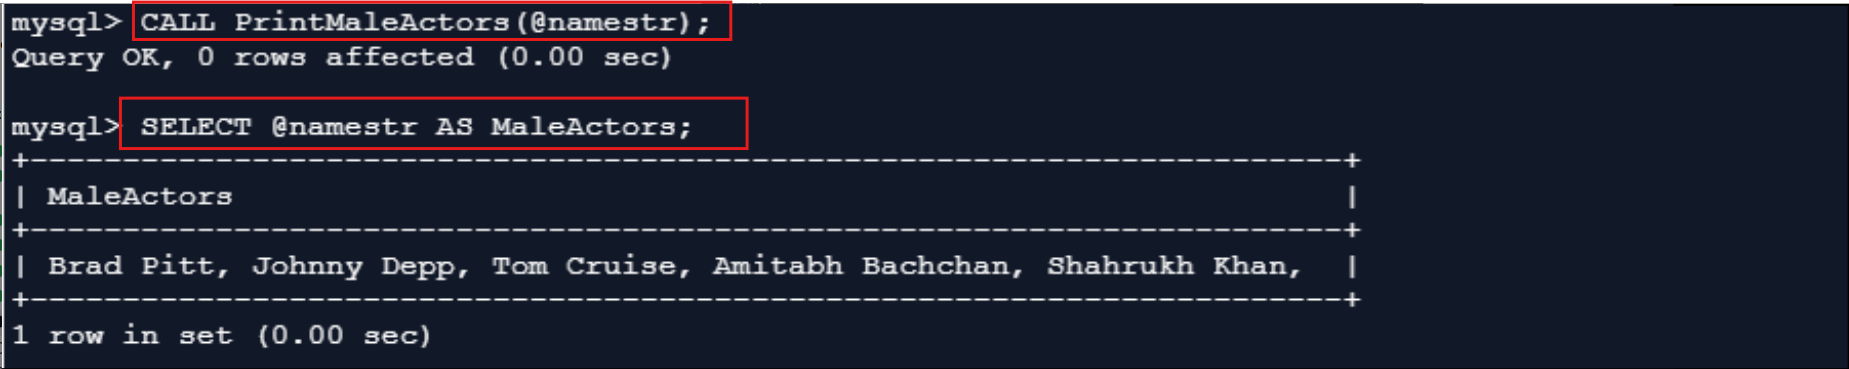

# Error Handling

When an error occurs during stored procedure execution, the error is returned to the calling program, and the stored procedure terminates. Error handling is necessary in order to avoid the abnormal termination of stored procedures.

A MySQL error handler has three main parts: **error condition**, **action**, and **statements**. An error handler specifies an **error condition** and the **statements to execute**, followed by an **action to be taken** if the error occurs.

The **error condition** is the reason why the handler is invoked and can be one of the three: a **MySQL error code**, a **SQLSTATE code**, or a **user-defined named condition associated with an error code or SQLSTATE value**. MySQL has error codes that are unique to the MySQL Server. On the other hand, ANSI has also defined error codes which are database independent. These are referred to as **SQLSTATE error codes**.

The **action** can either be to `CONTINUE` execution or `EXIT` the block or stored procedure. This action is taken after the statements defined in the handler are executed.

The last part of the handler is the **statements to be executed** once it is activated. Most of the time, the statement is simply setting a variable value to be checked within the stored procedure. But in some cases, multiple lines of code may be written within a `BEGIN END` block.

The `DECLARE HANDLER` statement is used to declare a handler.

**SYNTAX**

```mysql
DECLARE CONTINUE | EXIT HANDLER FOR

MySQL error code| SQLSTATE code| condition_name

statements;
```

* MySQL also has the option to define a name for an error condition.
* This facility makes the code readable because instead of using error codes that are difficult to remember, we can use easy-to-understand names.
* The `DECLARE CONDITION` statement is used to declare a named error condition by specifying a condition_name for a condition_value, which can be a **MySQL error code** or **SQLSTATE value**.
* The 1DECLARE CONDITION1 statement must appear before the `DECLARE HANDLER` statement.

```mysql
DECLARE condition_name CONDITION FOR condition_value;
```

---

**Example 1:**
* We have discussed an example of error handler in the lesson on cursors where an error is raised when the cursor tries to fetch a row that does not exist.
* To handle this error, the **NOT FOUND** condition needs to be addressed.

```mysql
DECLARE CONTINUE HANDLER FOR NOT FOUND 
SET RowNotFound = 1;
```

* This handler executes when the `NOT FOUND` condition is raised. It sets a variable **RowNotFound** to 1, and this variable is checked in every iteration of the loop.
* The action of the handler is to let the stored procedure `CONTINUE` execution to close the cursor and then exit the stored procedure.

---

**Example 2:** If an exception occurs during stored procedure execution, we can choose to rollback the previous operation and then exit the stored procedure as follows.

```mysql
DECLARE EXIT HANDLER FOR SQLEXCEPTION
BEGIN
 ROLLBACK;
 SELECT 'An error has occurred, operation rolled back and the stored procedure was terminated';
END;
```

* This handler executes when it encounters **SQLEXCEPTION**, which is a **SQLSTATE value**.
* It rolls back the last action performed and then creates an error message for the user.
* The `EXIT` action causes the block currently being executed to terminate.
* In case the block with the `EXIT` handler is enclosed within another block, then the inner block exits, and control goes to the outer block.

---

**Example 3:** One of the most common errors when inserting data is the duplicate key error. We can use the **MySQL error code 1062** to define a handler for this error as follows:

```mysql
DECLARE CONTINUE HANDLER FOR 1062
 BEGIN
     SELECT 'Duplicate key error occurred' AS message;
 END;
```

This handler is executed when a duplicate key error 1062 is encountered. The statement to execute is enclosed in the `BEGIN END` block. After the statement executes, the action is to `CONTINUE` execution.

---

**Example 4:**
* To create a **named condition**, let’s take the example of **MySQL error code 1322**, which is issued when a cursor statement is not a `SELECT` statement. 
* Instead of using **1322** in the handler, we can first give it a name that describes the error and then use that name in the handler to make the code readable.

```mysql
DECLARE WrongCursorStatement CONDITION for 1322 ; 

DECLARE EXIT HANDLER FOR WrongCursorStatement 
 SELECT 'Provide a SELECT statement for the cursor' Message; 
```

The `DECLARE CONDITION` statement must appear before the `DECLARE HANDLER` statement.

---

**Example 5:**

When MySQL reports an error, it provides both the **MySQL error code** as well as the **SQLSTATE value** of the error code.

For example, attempting to use a procedure name that already exists will result in an error:

```mysql
CREATE PROCEDURE abc()
BEGIN END;

CREATE PROCEDURE abc()
BEGIN END;
```

* The **MySQL error code** is **1304**, while the **SQLSTATE code** **42000** is mentioned within parentheses. 
* All **MySQL error codes** have corresponding **SQLSTATE values**, but these values may not be unique. 
* Many times, more than one **MySQL error codes** map to one **SQLSTATE value**.

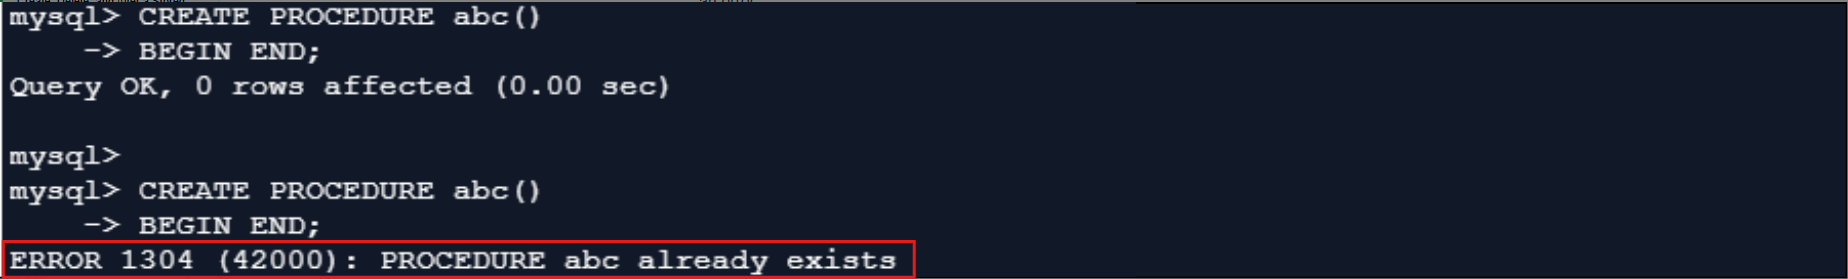

Consider the following error handler statements, which are for the same scenario but defined in terms of **MySQL error code**, **SQLSTATE value**, and the **NOT FOUND condition**, which is a shorthand for the class of **SQLSTATE values**.

```mysql
DECLARE CONTINUE HANDLER FOR 1329
SET LastRow =1;

DECLARE CONTINUE HANDLER FOR SQLSTATE ‘02000’
SET LastRow =1;

DECLARE CONTINUE HANDLER FOR NOT FOUND
SET LastRow =1;
```

* If all these are written in a stored procedure, they are all eligible to execute when a cursor fails to fetch a row.
* The **handler precedence rules** state that the most specific handler will execute.
* The **MySQL error code** takes the highest precedence, followed by **SQLSTATE** which is followed by the generic **SQLEXCEPTION**, **SQL WARNING**, and **NOT FOUND** handlers.
* So in our case, the first handler will execute.

The benefit of defining multiple handlers for the same condition is that we can handle specific errors in terms of **MySQL error codes** as well as write generic handlers for conditions that may occur unexpectedly.

---

**Example 6**:

In the end, we will discuss the **scope of an error handler**. The handler is relevant to the block in which it is defined.

Consider the following example where the `CONTINUE` handler is not invoked because it is not in the same block as the statement that produces the error.

```mysql
DELIMITER **
CREATE PROCEDURE HandlerScope( )
BEGIN
 BEGIN -- inner block
    DECLARE CONTINUE HANDLER FOR 1048 
        SELECT 'Value cannot be NULL' AS Message;
 END;

 INSERT INTO DigitalAssets(URL) VALUES (NULL);
END**
DELIMITER ;

CALL HandlerScope();
```

* The scope of this handler is the `BEGIN END` of the inner block. 
* The `INSERT` statement is outside the block in which the handler is defined, so it is not invoked when an error condition arises.

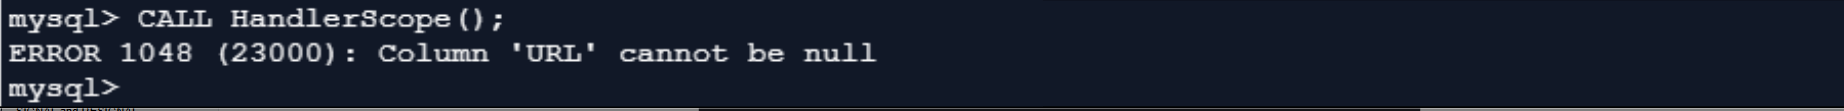

The handler scope covers any calls to a stored procedure contained within the same block as the handler declaration. Consider the following code:

```mysql
DELIMITER **
CREATE PROCEDURE proc1()
BEGIN
DECLARE CONTINUE HANDLER FOR 1048 
         SELECT 'Value cannot be NULL' AS Message;
CALL proc2();    
END**
DELIMITER ;


DELIMITER **
CREATE PRoCEDURE proc2()
BEGIN
 INSERT INTO DigitalAssets(URL) VALUES (NULL);
END**
DELIMITER ;
```

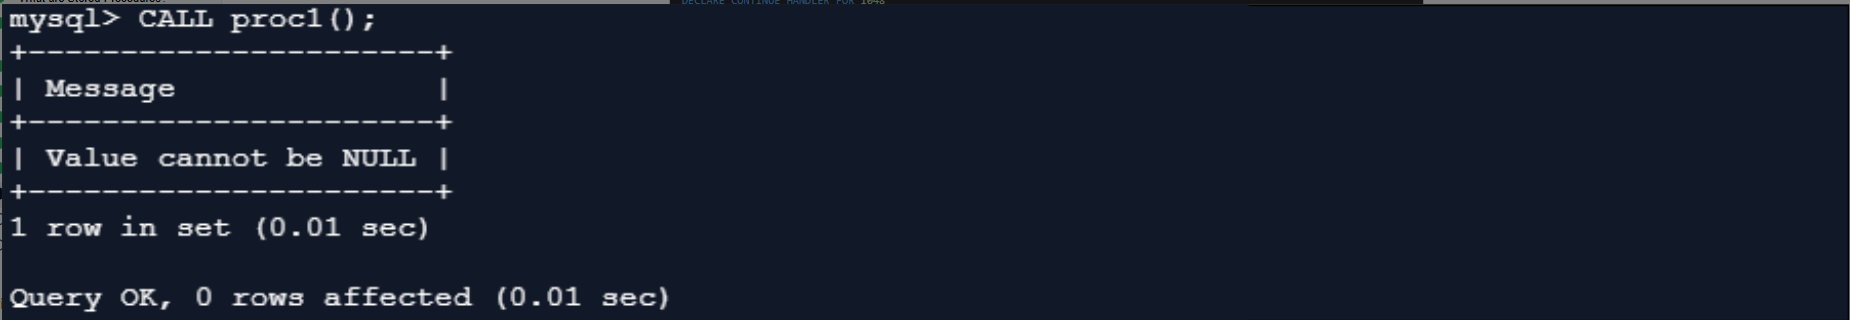

* The handler declared in **proc1** is invoked when the `INSERT` statement in **proc2** is executed.
* If we define a separate handler to handle error **1048** in **proc2**, then that handler will take precedence over the one defined in **proc1**.



# SIGNAL and RESIGNAL

`SIGNAL` statement is a way to return an error to a handler or a client application. The sender can choose which **error characteristics** (like the **error number** or **message text**) to return. `SIGNAL` provides a way to handle unexpected events that may lead to application termination. By raising errors, we can provide information to the error handler for a graceful exit rather than an abrupt termination.

* The `SIGNAL` keyword is used to raise errors.
* It is followed by a **SQLSTATE value** or **a named condition** defined with a **SQLSTATE value**.
* `SIGNAL` cannot be associated with a MySQL error code.
* The **SQLSTATE value 45000** is generic and can be used to catch any unhandled user-defined exceptions.
* The `SET` clause is used to return information about the error.
* The diagnostic information about an error includes **MYSQL_ERRNO**, **MESSAGE_TEXT**, **CLASS_ORIGIN**, **SUBCLASS_ORIGIN**, **CONSTRAINT_CATALOG**, **CONSTRAINT_SCHEMA**, **CONSTRAINT_NAME**, **CATALOG_NAME**, **SCHEMA_NAME**, **TABLE_NAME**, **COLUMN_NAME**, and **CURSOR_NAME**.
* The sender can choose to send more than one of these items as a comma-separated list.

**SYNTAX**

```mysql
SIGNAL SQLSTATE | condition_name
SET condition_information_item1 = val1, condition_information_item2 = val2, … ;
```

The `RESIGNAL` statement is similar to the `SIGNAL` statement. 
* It is used to raise warnings and errors.
* `RESIGNAL` passes on the information about an error condition to a handler.
* The **SQLSTATE value** and the `SET` clause are optional.
* `RESIGNAL` can be used alone, in which case it just passes the error without modifying the error information.
* When the `SET` clause is used with `RESIGNAL`, it is used to modify the error attributes, like changing the **error number** or the **message text**.
* `RESIGNAL` can only be used within the scope of a condition handler, while the SIGNAL statement can be used anywhere in a stored procedure.

**SYNTAX**

```mysql
RESIGNAL [SQLSTATE | condition_name]
[SET condition_information_item1 = val1, condition_information_item2 = val2, …];
```

---

**Example 1:**
* `SIGNAL` statement is a way to validate data before it is entered into the table.
* The following stored procedure **AddActor** adds an actor to the **Actors** table while checking that the data is valid.
* `SIGNAL` statement is used to raise an error if the age or net worth values are invalid.

```mysql
DELIMITER **

CREATE PROCEDURE AddActor(
              IN Name1 VARCHAR(20),
              IN Name2 VARCHAR(20), 
              IN Birthday DATE,
              IN networth INT )
BEGIN
 DECLARE age INT DEFAULT 0;
 SELECT TIMESTAMPDIFF (YEAR, Birthday, CURDATE())
 INTO age;

 IF(age < 1) THEN 
     SIGNAL SQLSTATE '45000'
     SET MESSAGE_TEXT = 'Incorrect DoB value. Age cannot be zero or less than zero';
 END IF;
 
 IF(networth < 1) THEN 
     SIGNAL SQLSTATE '45000'
         SET MESSAGE_TEXT = 'Incorrect NetWorth value. Net worth cannot be zero or less than zero';
 END IF;
 
 -- If all ok then INSERT a row in the Actors table
 INSERT INTO Actors (FirstName, SecondName, Dob, NetWorthInMillions) 
 VALUES(Name1, Name2, Birthday, networth);

END **
DELIMITER ;
```

Execute the following statements to call the stored procedure **AddActor** with incorrect values for **DoB** and **NetWorth** column and see how `SIGNAL` is used to raise errors:

```mysql
CALL AddActor('Jackson','Samuel','2020-12-21', 250);
CALL AddActor('Jackson','Samuel','1948-12-21', 0);
```

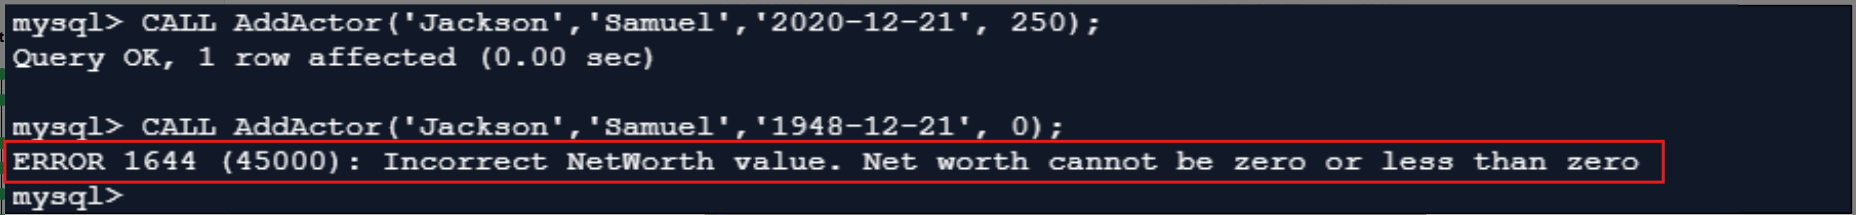

---

**Example 2:**
* We have used `SIGNAL` to raise an error when the age or net worth values were incorrect.
* Now we will write a handler to catch the error.
* The `RESIGNAL` statement is used with an error handler.

```mysql
DELIMITER **
CREATE PROCEDURE AddActor(
           IN Name1 VARCHAR(20),
           IN Name2 VARCHAR(20), 
           IN Birthday DATE,
           IN networth INT)
BEGIN
 DECLARE age INT DEFAULT 0;
 DECLARE InvalidValue CONDITION FOR SQLSTATE '45000';

 DECLARE CONTINUE HANDLER FOR InvalidValue 
 IF age < 1 THEN
     RESIGNAL;
 ELSEIF networth < 1 THEN
     RESIGNAL;
 END IF;

 SELECT TIMESTAMPDIFF (YEAR, Birthday, CURDATE())
 INTO age;
   
 IF age < 1 THEN
     SIGNAL InvalidValue;
 ELSEIF networth < 1 THEN
     SIGNAL InvalidValue;
 ELSE
     INSERT INTO Actors (FirstName, SecondName, Dob, NetWorthInMillions) 
     VALUES(Name1, Name2, Birthday, networth);
 END IF;
END **

DELIMITER ;
```

Execute the following statements to call the stored procedure **AddActor** with incorrect values for **DoB** and **NetWorth** column and see how `RESIGNAL` handles the errors:

```mysql
CALL AddActor('Jackson','Samuel','2020-12-21', 250);
CALL AddActor('Jackson','Samuel','1948-12-21', 0);
```

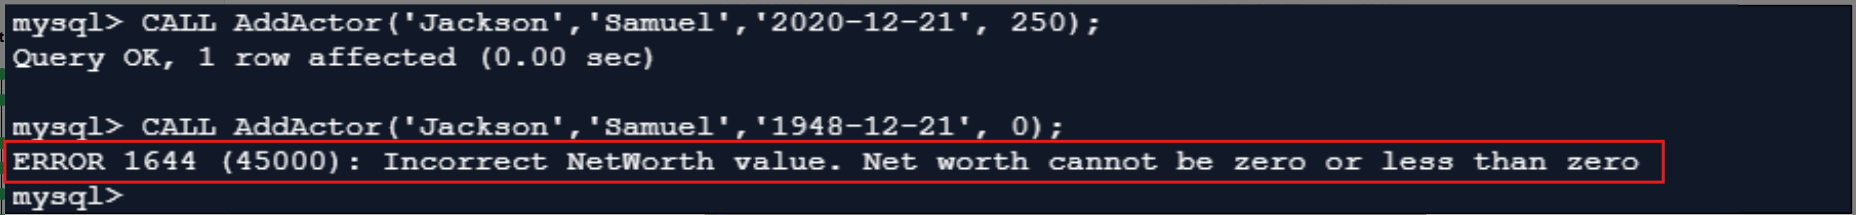

* When `RESIGNAL` is used alone, it just passes on the error as it is. 
* The original error message **“Unhandled user defined exception condition”** is shown.

Next, we will show how to modify this error message.

---

**Example 3:**
* Now we will modify our handler to change the `MESSAGE_TEXT` attribute of the error. 
* We will create an error message that clearly explains the error to the user.

```mysql
DELIMITER **
CREATE PROCEDURE AddActor(
         IN FirstName varchar(20),
         IN SecondName varchar(20), 
         IN DoB date,
         IN networth int )
BEGIN
 DECLARE age INT DEFAULT 0;
 DECLARE InvalidValue CONDITION FOR SQLSTATE '45000';

 DECLARE CONTINUE HANDLER FOR InvalidValue
     IF age < 1 THEN 
         RESIGNAL SET MESSAGE_TEXT = 'Incorrect DoB value. Age cannot be zero or less than zero';
     ELSEIF networth < 1 THEN 
         RESIGNAL SET MESSAGE_TEXT = 'Incorrect NetWorth value. Net worth cannot be zero or less than zero';
     END IF;
 
 SELECT TIMESTAMPDIFF (YEAR, DoB, CURDATE())
 INTO age;

 IF age < 1 THEN 
     SIGNAL InvalidValue;
 ELSEIF networth < 1 THEN 
     SIGNAL InvalidValue;
 ELSE
     INSERT INTO Actors (FirstName, SecondName, Dob, NetWorthInMillions) 
     VALUES(Name1, Name2, Birthday, networth);
 END IF;
 
END **
DELIMITER ;
```

Here we have used a single handler for two different error conditions, and once invoked, it dynamically sets the error message based on the condition.

```mysql
CALL AddActor('Jackson','Samuel','2020-12-21', 250);
CALL AddActor('Jackson','Samuel','1948-12-21', 0);
```

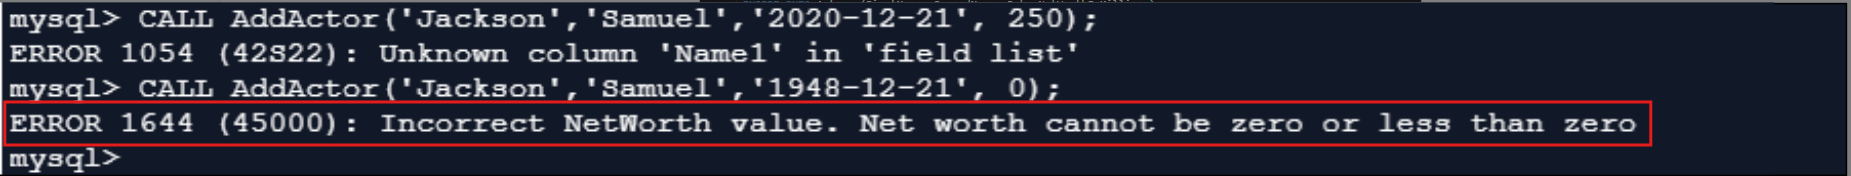

# Stored Functions

A **stored function** is a kind of stored program that can only **return one value**. 
* It can be used in SQL statements in place of an expression.
* Common formulas or expressions that are used over and over again can be written in stored functions to make the code reusable.
* However, if a stored function that queries data from tables is used in a SQL statement, then it may slow down the speed of the query.

**There are a number of differences when we compare stored functions to stored procedures.** 
* Stored procedures can call stored functions, but the opposite is not possible.
* Stored functions can be used in SQL statements, but stored procedures can only be called with the `CALL` keyword.
* Stored procedures are stored in compiled form, whereas stored functions are parsed and compiled at runtime.
* Return value is optional in stored procedures, but a must in stored functions.
* Moreover, stored functions can only return one value, but there is no such restriction on the number of return values in stored procedures.
* Stored functions only support `IN` parameter type while stored procedures can have `IN`, `OUT`, and `INOUT` parameters.
* Error handling is not possible in stored functions.

The `CREATE FUNCTION` statement is used to create a stored function. 
* The parameter list contains all the parameters of the function.
* Unlike stored procedures, where the parameters could be `IN`, `OUT`, or `INOUT` type, a stored function only takes `IN` parameters, so there is no need to specify the type of parameters in the parameter list.
* Since the stored function can return only one value, the data type of the return value is specified after the `RETURN` keyword.

A stored function can be **deterministic** or **non-deterministic**, meaning that for the same input parameters, the result will either be the same or different. 
* This can be specified by using the keywords `DETERMINISTIC` or `NOT DETERMINISTIC`.
* If this keyword is not specified, the type is set to `NOT DETERMINISTIC` by default.
* The function body must have at least one `RETURN` statement.
* When control reaches it, the stored function exits.

**SYNTAX**

```mysql
DELIMITER **

CREATE FUNCTION function_name(parameter_list)

RETURNS datatype

[NOT] DETERMINISTIC

BEGIN

function body

END **

DELIMITER ;
```

* To view all functions in a database, the `SHOW FUNCTION STATUS` statement is used.
* The results returned can be narrowed down based on the `LIKE` operator or any other condition specified in the optional `WHERE` clause.

```mysql
SHOW FUNCTION STATUS [LIKE ‘pattern’ | WHERE condition];
```

To delete a stored function, the `DROP FUNCTION` keywords with the optional `IF EXISTS` clause is used.

```mysql
DROP FUNCTION [IF EXISTS] function_name;
```

---

**Example 1**:

We will create a stored function to count the number of digital assets owned by an actor and return this number to the caller.

```mysql
DELIMITER **

CREATE FUNCTION DigitalAssetCount(
 ID INT) 
RETURNS VARCHAR(50)
DETERMINISTIC
BEGIN
 DECLARE ReturnMessage VARCHAR(50);
 DECLARE Number INT DEFAULT 0;
 SELECT COUNT(*) INTO Number FROM DigitalAssets WHERE ActorId = ID;

 IF Number = 0 THEN
     SET ReturnMessage = 'The Actor does not have any digital assets.';
 ELSE
     SET ReturnMessage = CONCAT('The Actor has ', Number, ' digital assets');
 END IF;
 
 -- return the customer level
 RETURN (ReturnMessage);
END**
DELIMITER ;
```

---

**Example 2**:

To view the functions in a database, the `SHOW FUNCTION STATUS` statement is used.

```mysql
SHOW FUNCTION STATUS;
```

The `SHOW FUNCTION STATUS` statement only shows those functions from the database currently used that the user has the privilege to view. 

We can specify a search condition in `WHERE` clause as follows:

```mysql
SHOW FUNCTION STATUS
WHERE db = 'MovieIndustry';
```

Similarly `LIKE` operator can also be used to narrow down the search results:

```mysql
SHOW FUNCTION STATUS 
LIKE '%Count%';
```

---

**Example 3**: The function **DigitalAssetCount** can be called in any SQL statement.

```mysql
SELECT Id, DigitalAssetCount(Id) AS Count
FROM Actors;
```

---

**Example 4**:

The function can also be called from stored procedures. The code below creates a stored procedure **GetDigitalAssetCount**, that calls the **DigitalAssetCount** function.

```mysql
DELIMITER **

CREATE PROCEDURE GetDigitalAssetCount(
 IN  ActorNo INT,  
 OUT Message VARCHAR(50))
BEGIN
 DECLARE Number INT DEFAULT 0;
 SET Number = ActorNo;    
 SET Message = DigitalAssetCount(Number);
END**

DELIMITER ;
```

This is a contrived example where the stored procedure is called with an actor ID. This ID is then used inside the stored procedure to call the stored function.

```mysql
CALL GetDigitalAssetCount(10,@assetcount);
SELECT @assetcount;
```

---

**Example 5**:

The **DigitalAssetCount** function is a **deterministic function** as it returns the same output when the function is called with the same input parameter. 

**Nondeterministic** functions are those that may return different outputs for the same input. 
* This is because they use `NOW()`, `RAND()`, or any other similar function.
* As an example, we will create a function **TimeSinceLastUpdate** to find how much time has elapsed since an actor updated a particular digital asset.
* The function takes two input parameters, **Actor ID** and the **Asset type**, and returns an `INT` value as the **number of seconds that have passed**.

```mysql
DELIMITER **

CREATE FUNCTION TimeSinceLastUpdate(
             ID INT,
             Asset VARCHAR(15)) 
RETURNS INT
NOT DETERMINISTIC
BEGIN
 DECLARE ElapsedTime INT;

 SELECT TIMESTAMPDIFF(SECOND, LastUpdatedOn, NOW())
 INTO ElapsedTime
 FROM DigitalAssets
 WHERE ActorID = ID AND AssetType = Asset;

 RETURN ElapsedTime;
END**
DELIMITER ;
```

* In the function body, we declare a variable for the elapsed time value and then use the `TIMESTAMPDIFF` function. 
* We have chosen SECOND as the unit for `TIMESTAMPDIFF` as it clearly demonstrates the **non-deterministic** nature of our function.

```mysql
SELECT TimeSinceLastUpdate(1,'Instagram');
```

Calling this function again and again will result in a different output.

---

**Example 6**:

As mentioned in the lesson on creating and listing stored procedures, the **ROUTINES** tables in the **information_schema** database contain information about all functions in all the databases. 

The following query shows all the functions in the **classicmodels** database:

```mysql
SELECT routine_name
FROM information_schema.routines
WHERE routine_type = 'FUNCTION' AND routine_schema = 'MovieIndustry';
```

---

**Example 7**:

We will now see how to remove this stored function.

```mysql
DROP FUNCTION DigitalAssetCount;
DROP FUNCTION IF EXISTS 
DigitalAssetCount;
```

When we try to drop a function that does not exist, a warning is issued. We can view the warning details using the `SHOW WARNINGS` statement:

```mysql
SHOW WARNINGS;
```